In [52]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


def create_plot():
    figure = plt.figure(figsize=(8, 6), facecolor='white')
    axes = figure.add_axes([0, 0, 1, 1])

    return axes


In [53]:
ap = 3

cards_cost = np.array([2, 1, 1, 1, 1])
cards_damage = np.array([8, 6, 0, 6, 6])

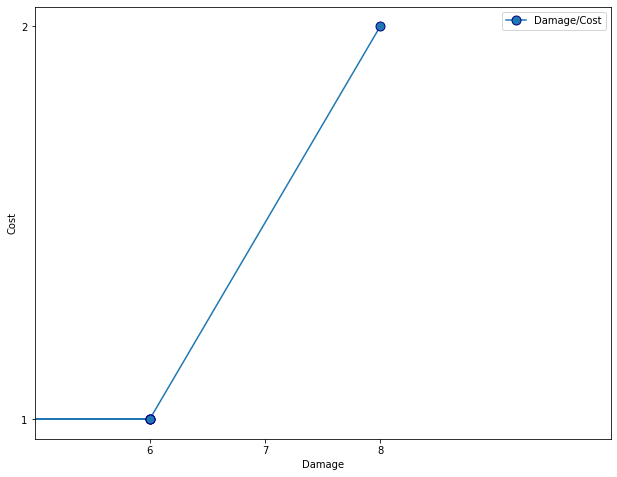

In [56]:
axes_0 = create_plot()

axes_0.set_xlabel('Damage')
axes_0.set_ylabel('Cost')

axes_0.set_xticks(np.arange(6, 9))
axes_0.set_yticks(np.arange(3))

axes_0.plot(cards_damage, cards_cost, marker='o', markersize=9, markeredgecolor='navy', label='Damage/Cost')

axes_0.set_xlim([5, 10])

axes_0.legend()

(1.0, 2.0)

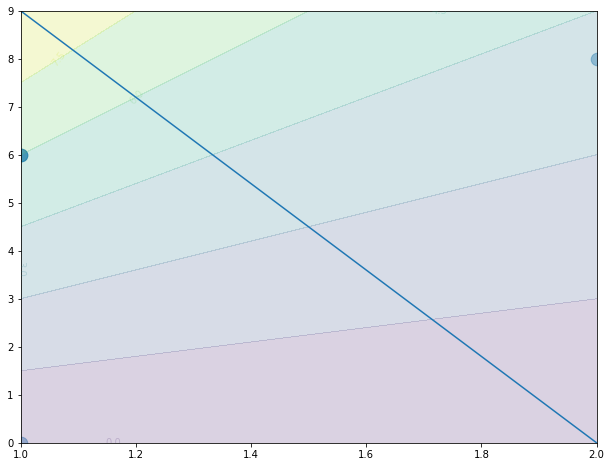

In [123]:
axes_1 = create_plot()

axes_1.scatter(cards_cost, cards_damage, alpha=0.4, s=160)
axes_1.plot([1, 2], [9, 0])

xs = np.linspace(1, 3, 100)
ys = np.linspace(0, 9, 100)

x, y = np.meshgrid(xs, ys)
points = np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)])
epsilon = 10 ** -5
label = (points[:, 1] / (points[:, 0] + epsilon))

CS = axes_1.contourf(x, y, label.reshape(x.shape), alpha=0.2)
CS.clabel()
axes_1.set_xlim([1, 2])

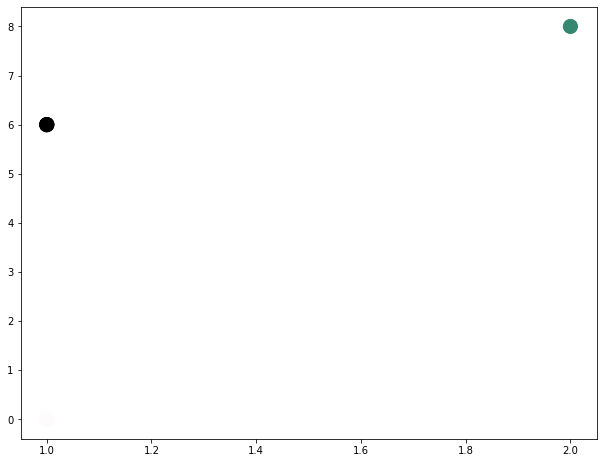

In [222]:
def score(costs_damage):
    epsilon = 10 ** -5

    return costs_damage[:, 1] / (costs_damage[:, 0] + epsilon)


damage_costs = np.hstack([cards_cost.reshape(-1, 1), cards_damage.reshape(-1, 1)])
damage_cost_labels = np.hstack([damage_costs, score(damage_costs).reshape(-1, 1)])

axes_1 = create_plot()

axes_1.scatter(
    damage_cost_labels[:, 0],
    damage_cost_labels[:, 1],
    s=200,
    c=damage_cost_labels[:, 2],
    cmap=plt.cm.gist_earth_r
)


In [243]:
to_take = damage_cost_labels[damage_cost_labels[:, 2].argsort()[::-1]]

result = np.array([]).reshape(-1, 3)
for take in to_take:
    result = np.vstack([result, take])

    if result[:, 0].sum() == ap:
        break

result


array([[1.     , 6.     , 5.99994],
       [1.     , 6.     , 5.99994],
       [1.     , 6.     , 5.99994]])